In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [16]:
# Reciprocal lattice vectors for bcc (simple cubic for basic model)
G_vectors = [
    np.array([0, 0, 0]),
   # np.array([1, 0, 0]),
   # np.array([2, 0, 0]),
]

# High-symmetry points in reduced coordinates
Gamma = np.array([0, 0, 0])
P = np.array([0.5, 0.5, 0.5])
H = np.array([1, 0, 0])
N = np.array([0.5, 0.5, 0])

k_points = [Gamma, H, P, N]
labels = [r'$\Gamma$', 'H', 'P', 'N']

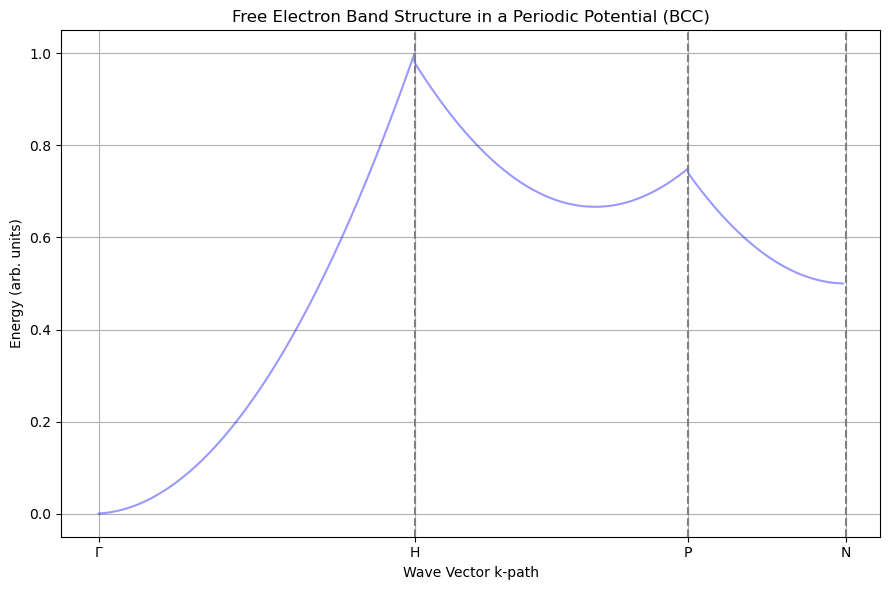

In [ ]:
segments = 50

# Build k-path
k_path = []
k_dist = [0]
for i in range(len(k_points) - 1):
    segment = np.linspace(k_points[i], k_points[i+1], segments, endpoint=False)
    k_path.extend(segment)
    dist = np.linalg.norm(k_points[i+1] - k_points[i])
    k_dist.extend(np.array(k_dist[-1]) + np.linspace(0, dist, segments, endpoint=False).tolist())

k_path.append(k_points[-1])
k_dist.append(k_dist[-1] + np.linalg.norm(k_points[-1] - k_points[-2]))
k_path = np.array(k_path)

# Calculate energies for several bands (using multiple G vectors)
bands = []
for G in G_vectors:
    band = [(np.linalg.norm(k + G))**2 for k in k_path]
    bands.append(band)

# Plotting
plt.figure(figsize=(9, 6))
for band in bands:
    plt.plot(k_dist[:-2], band[:-1], 'b', alpha=0.4)

plt.xticks(
    [k_dist[0], k_dist[segments], k_dist[2 * segments], k_dist[3 * segments]],
    labels
)
plt.axvline(x=k_dist[segments], color='gray', linestyle='--')
plt.axvline(x=k_dist[2 * segments], color='gray', linestyle='--')
plt.axvline(x=k_dist[3 * segments], color='gray', linestyle='--')

plt.title("Free Electron Band Structure in a Periodic Potential (BCC)")
plt.ylabel("Energy (arb. units)")
plt.xlabel("Wave Vector k-path")
plt.grid(True)
plt.tight_layout()
plt.show()